In [1]:
#imports
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
import copy

In [2]:
#helper functions
"""
vertArr = an array of numbers that represent vertices
faceMatrix = matrix of each face of a shape and the vertices that touch them

uses the face matrix to check if the vetArr is a coverage of it
"""
def solChecker(vertArr, faceMatrix):
    #loops through each face
    for face in faceMatrix:
        #makes a list comperhension of all the verts in vert array that it is toching 
        #then checks if the length is 0
        if len([i for i in vertArr if i in face]) == 0:
            #if it is then it returns false
            return False
    #if it runs through every face then it is true
    return True

#function the determins the redundancy of a solution
def redundancy(vertArr, faceMatrix):
    redund = 0
    #check if it is a solution
    if not solChecker(vertArr,faceMatrix):
        return -1
    #loops through each face
    for face in faceMatrix:
        #creates a holing val
        numOfVertsToching = 0
        #loops through vertices
        for vert in vertArr:
            #if the face is touching the vert increase holding var
            if vert in face:
                numOfVertsToching += 1
        #if the holding var is greater then 1 adds how many times the face is redundent
        if numOfVertsToching > 1:
            redund += 1
    return redund

#converter : changes [1,0,1,0] to [1,3]
def binaryToVertArr(sol):
    solArr = []
    for i in range(0,len(sol)):
        if sol[i] == 1:
            solArr.append(i+1)
    return solArr

In [3]:
#Loading the 600cell into mem
import csv
faceMatrix = []
with open('600cellFolder/sixhundredcell_3_corrected-Copy1.csv') as csvFile:
    for row in csv.reader(csvFile, delimiter=','):
        holdingarr = []
        for i in row:
            holdingarr.append(int(i))
        faceMatrix.append(holdingarr)
#print(faceMatrix)

In [4]:
#create scoring function
def solutionScore(binarySol):
    score = 0
    sol = binaryToVertArr(binarySol)
    #loops though each face
    for face in faceMatrix:
        #makes a list comperhension of all the verts in vert array that it is toching 
        #then checks if the length is 0
        if len([i for i in sol if i in face]) == 0:
            #if it is then it returns false
            score+=1
        #calculates the redundency then adds to score
        else:
            numOfVertsToching = 0
            #loops through vertices
            for vert in sol:
            #if the face is touching the vert increase holding var
                if vert in face:
                    numOfVertsToching += 1
            #if the holding var is greater then 1 adds how many times the face is redundent
            if numOfVertsToching > 1:
                score += 1
        
    
    return score

In [5]:
#tessting scoring function
binarySol = [0,1,1,0,0,1]
print(solutionScore(binarySol))

540


In [6]:
#find the number of dims
dim = np.max(faceMatrix)
#creates varbounds
varbounds = np.array([[0,1]]*dim)

 The best solution found:                                                                           
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

 Objective function:
 150.0


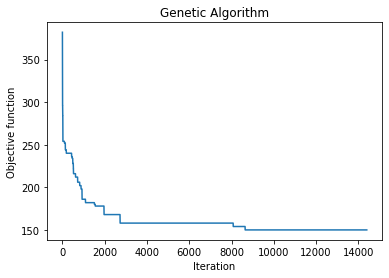

In [8]:
#creates the model and runs it on default params
model = ga(function = solutionScore, dimension = dim, variable_type = "int", variable_boundaries = varbounds)
model.run()

In [3]:
bestSol = binaryToVertArr([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

print("{0} : Size - {1}".format(bestSol,len(bestSol)))


[7, 16, 19, 21, 24, 25, 31, 32, 35, 38, 43, 44, 46, 47, 48, 49, 53, 55, 56, 60, 70, 76, 79, 80, 89, 93, 109, 113, 117] : Size - 29


 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

 Objective function:
 164.0


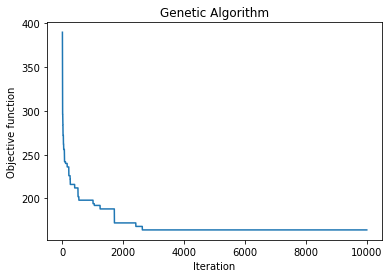

In [7]:
#Trying diffrent params
algoParams={'max_num_iteration': 10000,
            'population_size':100,
            'mutation_probability':0.1,
            'elit_ratio': 0.01,
            'crossover_probability': 0.5,
            'parents_portion': 0.3,
            'crossover_type':'uniform',
            'max_iteration_without_improv':None}

model = ga(function = solutionScore, dimension = dim, variable_type = "int", variable_boundaries = varbounds, algorithm_parameters=algoParams)
model.run()

 The best solution found:                                                                           
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]

 Objective function:
 246.0


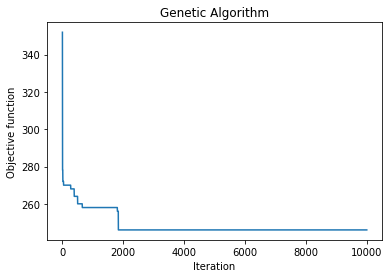

In [8]:
#Trying diffrent params
algoParams={'max_num_iteration': 10000,
            'population_size':100
            'mutation_probability':0.5,
            'elit_ratio': 0.01,
            'crossover_probability': 0.5,
            'parents_portion': 0.3,
            'crossover_type':'uniform',
            'max_iteration_without_improv':None}

model = ga(function = solutionScore, dimension = dim, variable_type = "int", variable_boundaries = varbounds, algorithm_parameters=algoParams)
model.run()

In [ ]:
#didn't get really good results from any of the runs